<center>
<img src="https://drive.google.com/uc?id=1f1gGVI-rxcHjA90WEGNvvtSXF1pAxQwg" alt="Fasilkom UI" width="300"/>

CSGE603130 • Kecerdasan Artifisial dan Sains Data Dasar

Semester Ganjil 2021/2022

Fakultas Ilmu Komputer, Universitas Indonesia

##**Lab *4*: *Decision Tree & Random Forest***

###**Tenggat Waktu: 26 Maret 2022, 23.55 WIB**
</center>

####**Ketentuan:**

1. Dokumen template lab dengan format .ipynb dan dataset (jika dibutuhkan) telah disediakan di SCeLe
2. Jalankan kode pada dokumen .ipynb dan perhatikan dengan saksama apa yang potongan kode tersebut lakukan beserta dengan keluarannya. Jawablah **pertanyaan yang disisipkan** pada potongan program yang diberikan.
3. Dokumen Jupyter Notebook yang telah dilengkapi dengan jawaban dikumpulkan dengan format penamaan **Kelas_LabX_NPM_Nama.ipynb**. Contoh: F_Lab4_1706979341_Lulu Ilmaknun Qurotaini.ipynb
4. Kumpulkan dokumen tersebut pada submisi yang telah disediakan di SCeLe sesuai dengan kelas masing-masing sebelum **26 Maret 2022, 23.55 WIB**. Keterlambatan pengumpulan akan dikenakan pinalti.
5. Lab ini dirancang sebagai **tugas mandiri**. Plagiarisme tidak diperkenankan dalam bentuk apapun. Adapun kolaborasi berupa diskusi (tanpa menyalin maupun mengambil jawaban orang lain) dan literasi masih diperbolehkan dengan mencantumkan kolaborator dan sumber.


## **Pertanyataan Integritas**

Wajib diisi. Tanpa pernyataan integritas submisi akan dikenakan pinalti.

In [101]:
# Isi dengan data diri Anda
NAMA = "Muhammad Faisal Adi Soesatyo"
KELAS = "B"
NPM = "1906293184"

# Isi dengan NPM teman yang berdiskusi dengan Anda
KOLABORATOR = []

# Isi dengan sumber referensi yang Anda gunakan dalam mengerjakan
REFERENSI = [
             "https://towardsdatascience.com/understanding-decision-trees-once-and-for-all-2d891b1be579",
             "https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html",
             "https://medium.com/analytics-vidhya/confusion-matrix-accuracy-precision-recall-f1-score-ade299cf63cd#:~:text=F1%20Score%20becomes%201%20only,0.857%20%2B%200.75)%20%3D%200.799.",
             "https://stackoverflow.com/questions/34165731/a-column-vector-y-was-passed-when-a-1d-array-was-expected",
             "https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html",
             "https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html",
]

In [2]:
PERNYATAAN_INTEGRITAS = "Saya, %s dari kelas %s dengan NPM %s, menyatakan bahwa seluruh jawaban pada pekerjaan ini murni saya kerjakan sendiri.\n\
Saya tidak mencontek jawaban, memberikan jawaban, maupun menyalin dari sumber manapun.\n \
\n\
Jika saya melanggar pernyataan tersebut, saya siap menerima konsekuensi apapun yang diberikan.\n   \
(%s)" % (NAMA, KELAS, NPM, NAMA)

print(PERNYATAAN_INTEGRITAS)

Saya, Muhammad Faisal Adi Soesatyo dari kelas B dengan NPM 1906293184, menyatakan bahwa seluruh jawaban pada pekerjaan ini murni saya kerjakan sendiri.
Saya tidak mencontek jawaban, memberikan jawaban, maupun menyalin dari sumber manapun.
 
Jika saya melanggar pernyataan tersebut, saya siap menerima konsekuensi apapun yang diberikan.
   (Muhammad Faisal Adi Soesatyo)


# Dataset

Tugas ini menggunakan <b>Dataset Travel Insurance</b> (Sumber: https://www.kaggle.com/tejashvi14/travel-insurance-prediction-data dengan perubahan.)  
Dataset terdiri dari:
 - 8 atribut 
    * Age – Usia Customer
    * EmployedbyGovernment – Apakah customer merupakan pegawai pemerintahan atau bukan (1 berarti merupakan pegawai pemerintahan)
    * GraduateOrNot – Apakah Customer telah lulus kuliah atau tidak (1 artinya iya)
    * AnnualIncome – Gaji tahunan customer
    * FamilyMembers – Jumlah anggota keluarga customer
    * ChronicDiseases – Apakah customer memiliki riwayat penyakit kronis
    * FrequentFlyer – Apakah customer sering memesan tiket pesawat atau tidak
    * EverTravelledAbroad - Apakah customer pernah pergi ke luar negeri
 - 1 target
    * TravelInsurance - Apakah customer membeli asuransi perjalanan atau tidak
 - 1986 baris data

In [3]:
import pandas as pd

# Import data
data = pd.read_csv('TravelInsurancePrediction.csv')
data.drop("Unnamed: 0", axis=1, inplace = True)
data.head(5)

,Age,EmployedbyGovernment,GraduateOr0t,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,1,1,400000,6,1,0,0,0
1,31,0,1,1250000,7,0,0,0,0
2,34,0,1,500000,4,1,0,0,1
3,28,0,1,700000,3,1,0,0,0
4,28,0,1,700000,8,1,1,0,0


In [7]:
label = data['TravelInsurance'].to_frame() # Label pada data (Untuk diprediksi pada saat klasifikasi)
del data['TravelInsurance'] # Menghapus label dan menyisakan hanya fitur pada data
data.head(5)

,Age,EmployedbyGovernment,GraduateOr0t,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad
0,31,1,1,400000,6,1,0,0
1,31,0,1,1250000,7,0,0,0
2,34,0,1,500000,4,1,0,0
3,28,0,1,700000,3,1,0,0
4,28,0,1,700000,8,1,1,0


In [8]:
from sklearn.model_selection import train_test_split

# Membagi dataset menjadi training set dan test set
# dengan jumlah training set adalah sebanyak 80% dari data keseluruhan 
data_train, data_test, label_train, label_test = train_test_split(data, label, train_size=0.8, random_state=42)

# CART (Classification and Regression Tree)

## Decision Tree

Decision Tree adalah sebuah model yang menggunakan struktur berupa Binary  Tree (Setiap node memiliki maksimal 2 children). Decision Tree digunakan pada data science yang bersifat Supervised Learning (Model akan dibangun menggunakan data training, lalu selanjutnya akan digunakan untuk memprediksi output dari data yang diberikan). Data training yang dilakukan untuk melatih model akan diubah menjadi serangkaian aturan yang berbentuk Binary Tree. Aturan yang didapat tersebut  digunakan untuk proses prediksi pada data yang lainnya.

### Training

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Melakukan training pada model decision tree
dt_md = DecisionTreeClassifier()
dt_md.fit(data_train, label_train)

DecisionTreeClassifier()

### Evaluasi

In [10]:
# Memprediksi data testing
predicted = dt_md.predict(data_test)

# Menampilkan metrics evaluasi berupa nilai akurasi, presisi, recall, dan F1-Score
print("Akurasi:", accuracy_score(label_test, predicted))
print("Presisi:", precision_score(label_test, predicted))
print("Recall:", recall_score(label_test, predicted))
print("F1-score:", f1_score(label_test, predicted))

Akurasi: 0.8140703517587939
Presisi: 0.7768595041322314
Recall: 0.6666666666666666
F1-score: 0.7175572519083968


### *Hyperparameter*

*Hyperparameter* merupakan parameter yang bisa kita ubah/atur nilainya sebelum kita membangun model yang akan digunakan. Tujuan dari perubahan parameter tersebut adalah untuk menghasilkan model yang harapannya bisa bekerja dengan lebih baik.  

Terdapat beberapa hyperparameter pada berbagai algoritma *machine learning*, salah satunya adalah pada algoritma Decision Tree. Beberapa *hyperparameter* yang terdapat pada algoritma  Decision Tree di modul `sklearn.tree` adalah: 
* `criterion`: Kriteria untuk menilai seberapa bagus pemecahan node, ada gini dan entropy, untuk penjelasan lanjut bisa dilihat [di sini](https://quantdare.com/decision-trees-gini-vs-entropy/)
* `max_depth`: Kedalaman maksimal dari Tree
* `min_samples_split`: Jumlah sample minimal yang diperlukan untuk memecah suatu internal node

Informasi lebih lanjut dapat dilihat pada dokumentasi berikut:
[sklearn decision tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Melakukan training pada model decision tree
# Decision tree yang dibangun memiliki hyperparameter max_depth=3
dt_md6 = DecisionTreeClassifier(max_depth=6)
dt_md6.fit(data_train, label_train)

# Memprediksi data testing
predicted6 = dt_md6.predict(data_test)

# Menampilkan metrics evaluasi berupa nilai akurasi, presisi, recall, dan F1-Score
print("Akurasi:", accuracy_score(label_test, predicted6))
print("Presisi:", precision_score(label_test, predicted6))
print("Recall:", recall_score(label_test, predicted6))
print("F1-score:", f1_score(label_test, predicted6))

Akurasi: 0.8291457286432161
Presisi: 0.9506172839506173
Recall: 0.5460992907801419
F1-score: 0.6936936936936937


Perubahan *hyperparameter* dapat mempengaruhi performa dari model. Pada awalnya tanpa max_depth model menghasilkan akurasi 81% dan *recall* 65%. Setelah dilakukan perubahan *hyperparameter* dengan `max_depth = 6`, kita dapat melihat bahwa ada peningkatan pada performa model dengan akurasi 83% namun terdapat penurunan pada *recall* menjadi 56%.

Bagaimana jika hyperparameter lain diubah? Silakan eksplorasi perubahan hyperparameter lain secara mandiri ya!😃

### Visualisasi Decision Tree yang Dihasilkan

Kita bisa melakukan visualisasi terhadap serangkaian aturan yang membentuk Decision Tree yang telah dibangun. Salah satu caranya adalah dengan menggunakan modul `sklearn.tree.plot_tree` dengan bantuan `matplotlib`.

Berikut adalah contoh visualisasi decision tree pada dataset travel insurance tanpa max depth:

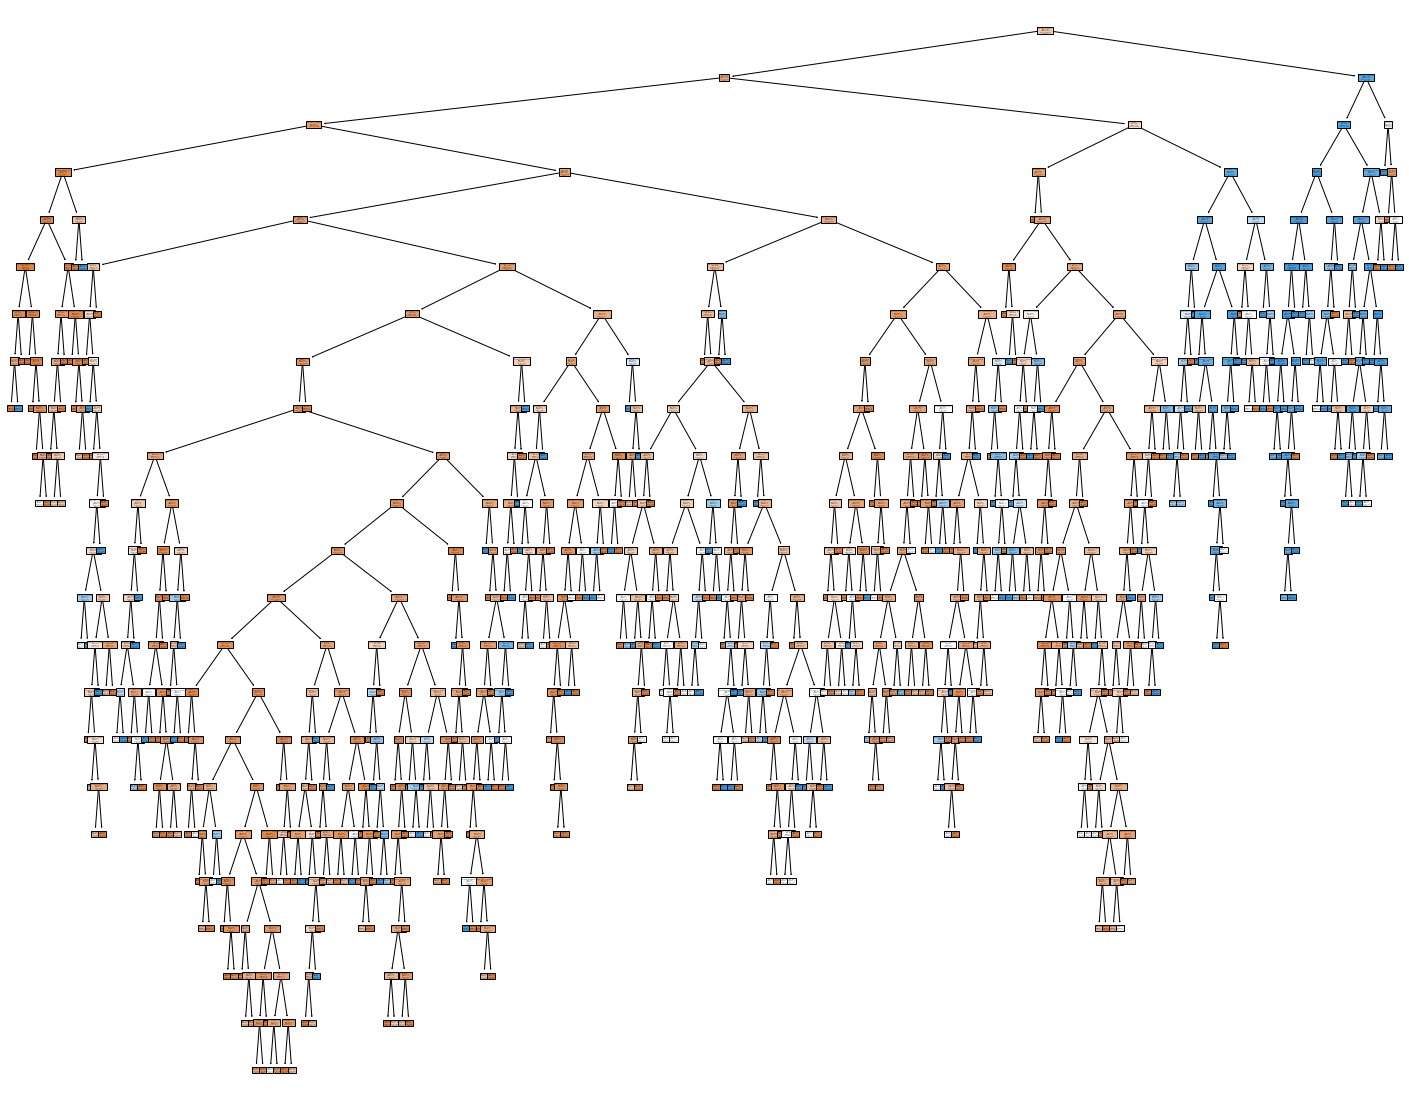

In [12]:
from sklearn import datasets
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

# Melakukan visualisasi pada decision tree yang sudah dibangun sebelumnya
features = list(data_train.columns)
labels = [str(label) for label in list(label_train['TravelInsurance'].unique())]

fig = plt.figure(figsize=(25,20))

# parameter filled berguna untuk melihat majority class class mayoritas
# dari klasifikasi
_ = plot_tree(dt_md, feature_names=features, class_names=labels, filled=True)

Dapat dilihat bahwa *decision tree* yang dihasilkan terlihat sangat kompleks. Hal tersebut beresiko untuk terjadi *overfitting* dan juga sulit untuk divisualisasikan. Oleh karena itu, akan perubahan *hyperparameter* pada model decision tree bisa membuat model yang dihasilkan tidak terlalu kompleks.

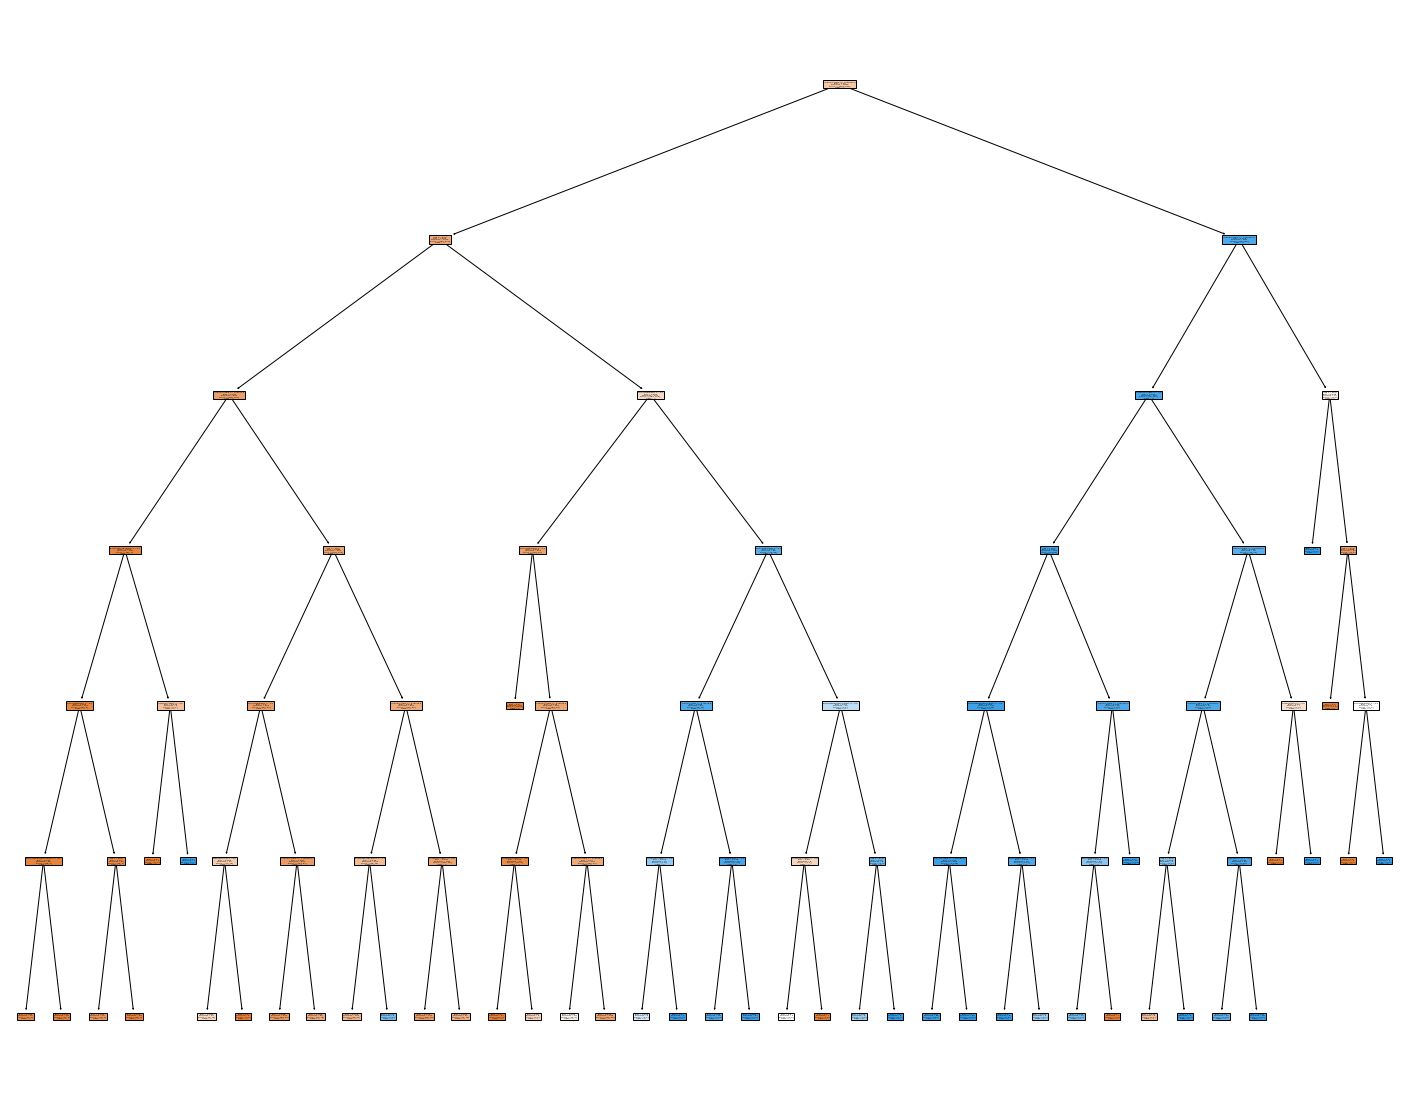

In [13]:
from sklearn import datasets
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

# Melakukan visualisasi pada decision tree yang sudah dibangun sebelumnya
features = list(data_train.columns)
labels = [str(label) for label in list(label_train['TravelInsurance'].unique())]

fig = plt.figure(figsize=(25,20))
_ = plot_tree(dt_md6, feature_names=features, class_names=labels, filled=True)

Pada model decision tree di atas, dilakukan pembatasan pada kedalaman maksimal dengan mengatur nilai dari `max_depth`. Perubahan *hyperparameter* ini dilakukan untuk mendapatkan model dengan jenis yang sama namun atribut yang berbeda. Untuk pemilihan *hyperparameter* apa yang tepat, biasanya memperhatikan persebaran data pada dataset yang diberikan dan dibantu oleh pengalaman dalam melakukan serangkaian kegiatan data science.  

Pemilihan dari *hyperparameter* biasanya disebut sebagai *Hyperparameter Tuning* dan ada metode yang dinamakan Grid Search Cross Validation yang bisa digunakan untuk memilih *hyperparameter* terbaik dari beberapa *hyperparameter* yang disediakan berdasarkan kriteria tertentu. Jika kalian tertarik terkait dengan penerapan Grid Search Cross Validation, silakan mencari dan mempraktikannya sebagai latihan mandiri.

Informasi lebih lanjut dapat diakses pada dokumentasi berikut: [link text](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)

## Ensemble Learning

*Ensemble Learning* adalah proses di mana kita menggunakan banyak model untuk mendapatkan hasil yang lebih baik dibandingkan dengan menggunakan satu model saja. Salah satu jenis *ensemble learning* adalah *bagging* (*bootstrap aggregating*). 

Pada metode *bagging*, setiap model akan dilatih menggunakan subhimpunan dari data *training* (tidak keseluruhan data latih digunakan dalam setiap proses *training*). Pada subhimpunan data yang satu dengan yang lainnya bisa mengandung data yang sama (tidak harus beda semua), hal inilah yang disebut dengan *bootstrap sampling*. Nantinya, setiap model yang telah dilatih akan melakukan proses prediksi terhadap data yang baru. Hasil prediksi akhir didapatkan melalui sistem *majority voting* di mana hasil akhirnya akan menggunakan hasil prediksi yang paling banyak muncul pada model-model yang telah dibuat.

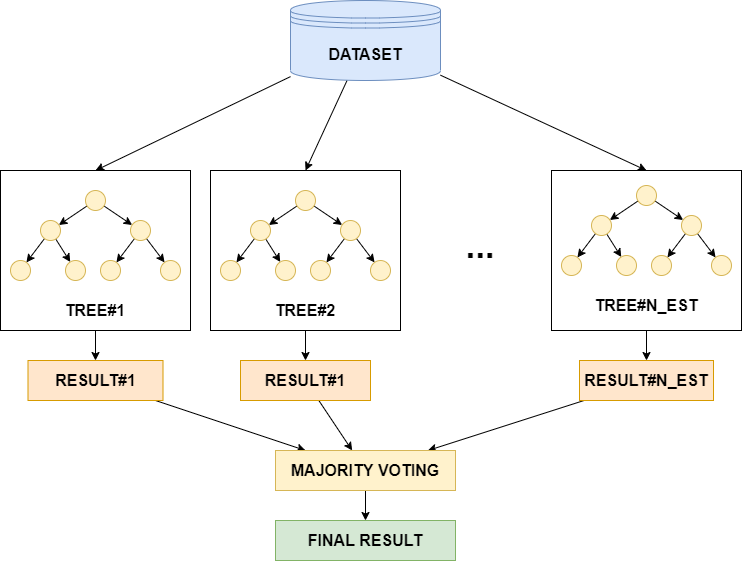

Sumber: Olahan Pribadi

## *Random Forest*

*Random Forest* merupakan salah satu variasi dari konsep *bagging* pada *ensemble learning* yang menggunakan Decision Tree sebagai basis modelnya. Setiap model yang dibangun berupa Decision Tree dan nantinya model tersebut dilatih dan digunakan untuk melakukan prediksi. Output dari Random Forest itu sendiri merupakan hasil prediksi yang paling banyak muncul di antara model-model Decision Tree.

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Melakukan training pada model random forest
rf_md3 = RandomForestClassifier(max_depth= 25, n_estimators= 50)
rf_md3.fit(data_train, label_train)

# Memprediksi data testing
predicted = rf_md3.predict(data_test)

# Menampilkan metrics evaluasi berupa nilai akurasi, presisi, recall, dan F1-Score
print("Akurasi:", accuracy_score(label_test, predicted))
print("Presisi:", precision_score(label_test, predicted))
print("Recall:", recall_score(label_test, predicted))
print("F1-score:", f1_score(label_test, predicted))

Akurasi: 0.8090452261306532
Presisi: 0.7777777777777778
Recall: 0.6453900709219859
F1-score: 0.7054263565891473


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Terlihat bahwa perubahan yang signifikan terjadi pada metrik presisi dan *recall*. Presisi yang dihasilkan Random Forest pada kasus ini lebih rendah daripada Decision Tree, namun recall dari Random Forest lebih tinggi daripada Decision Tree.

Diharapkan untuk mempelajari kelebihan dan kekurangan dari setiap jenis model yang dipelajari agar kita bisa mengetahui pada dataset seperti apa suatu jenis model cocok untuk digunakan. Agar model yang dihasilkan lebih baik, kita juga harus bisa memilih *hyperparameter* yang sesuai dengan permasalahan yang ingin diselesaikan.

Adapun beberapa *hyperparameter* yang dapat kita eksplorasi pada Random Forest:
* `n_estimators`: Berapa banyak decision tree yang akan membentuk random forest
* `max_depth`: Kedalaman maksimal dari masing-masing Decision Tree
* `min_samples_split`: Jumlah sample minimal yang diperlukan untuk memecah suatu internal node pada setiap Decision Tree

Informasi lebih lanjut dapat diakses pada dokumentasi berikut: [dokumentasi Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

# Hyperparameter Tuning

Hyperparameter tuning dapat digunakan ntuk mendapatkan hasil evaluasi yang terbaik untuk suatu model. Misalkan kita ingin mendapatkan parameter terbaik untuk model Decision Tree, maka kita harus mencoba berbagai kombinasi hyperparameter yang diinginkan. Untuk mempermudah mencari hyperparameter yang tepat, kita dapat menggunakan modul GridSearchCV dari library Scikit-Learn. Informasi lebih lanjut mengenai GridSearchCV dapat diakses [di sini](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)

Beberapa parameter yang sering digunakan, yaitu:
- `estimator`: model yang akan digunakan
- `param_grid`: kombinasi berbagai hyperparameter yang akan digunakan.
- `cv`: jumlah cross-validation yang ingin digunakan

In [15]:
from sklearn.model_selection import GridSearchCV
param_grid = {'criterion': ['gini', 'entropy'],
               'max_features': [None, 'sqrt', 'log2'],
               'min_samples_split': [2, 4, 10, 20, 50],
               'max_depth' : [5, 6, 7, None]}

dt = DecisionTreeClassifier()

clf = GridSearchCV(estimator= dt, 
                   param_grid=param_grid, cv= 5)

clf.fit(data_train, label_train)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 6, 7, None],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_split': [2, 4, 10, 20, 50]})

In [16]:
clf.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'max_features': None,
 'min_samples_split': 2}

In [17]:
best_hp = DecisionTreeClassifier(**clf.best_params_)
print("Akurasi:", accuracy_score(label_test, predicted))
print("Presisi:", precision_score(label_test, predicted))
print("Recall:", recall_score(label_test, predicted))
print("F1-score:", f1_score(label_test, predicted))

Akurasi: 0.8090452261306532
Presisi: 0.7777777777777778
Recall: 0.6453900709219859
F1-score: 0.7054263565891473


Sekarang kita mendapatkan kombinasi terbaik dari berbagai kombinasi hyperparameter yang telah kita coba.

# Latihan Soal

## SOAL 1

Implementasikan sebuah model Decision Tree untuk melakukan suatu task klasifikasi yang memprediksi `TravelInsurance` dari customer.

### SOAL 1a
[5] Bangun model decision tree dengan memberikan nilai pada *hyperparameter* `max_depth = 3`.

In [50]:
# Implementasi code di sini
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

decision_tree_depth_3 = DecisionTreeClassifier(max_depth = 3)
decision_tree_depth_3.fit(data_train, label_train)

# predicted_data_depth_3 = decision_tree_depth_3.predict(data_test)

# print("Accuracy:", accuracy_score(label_test, predicted_data_depth_3))
# print("Precision:", precision_score(label_test, predicted_data_depth_3))
# print("Recall:", recall_score(label_test, predicted_data_depth_3))
# print("F1-Score:", f1_score(label_test, predicted_data_depth_3))

DecisionTreeClassifier(max_depth=3)

### SOAL 1b
[5]  Visualisasikan model decision tree yang didapat pada soal 1a!

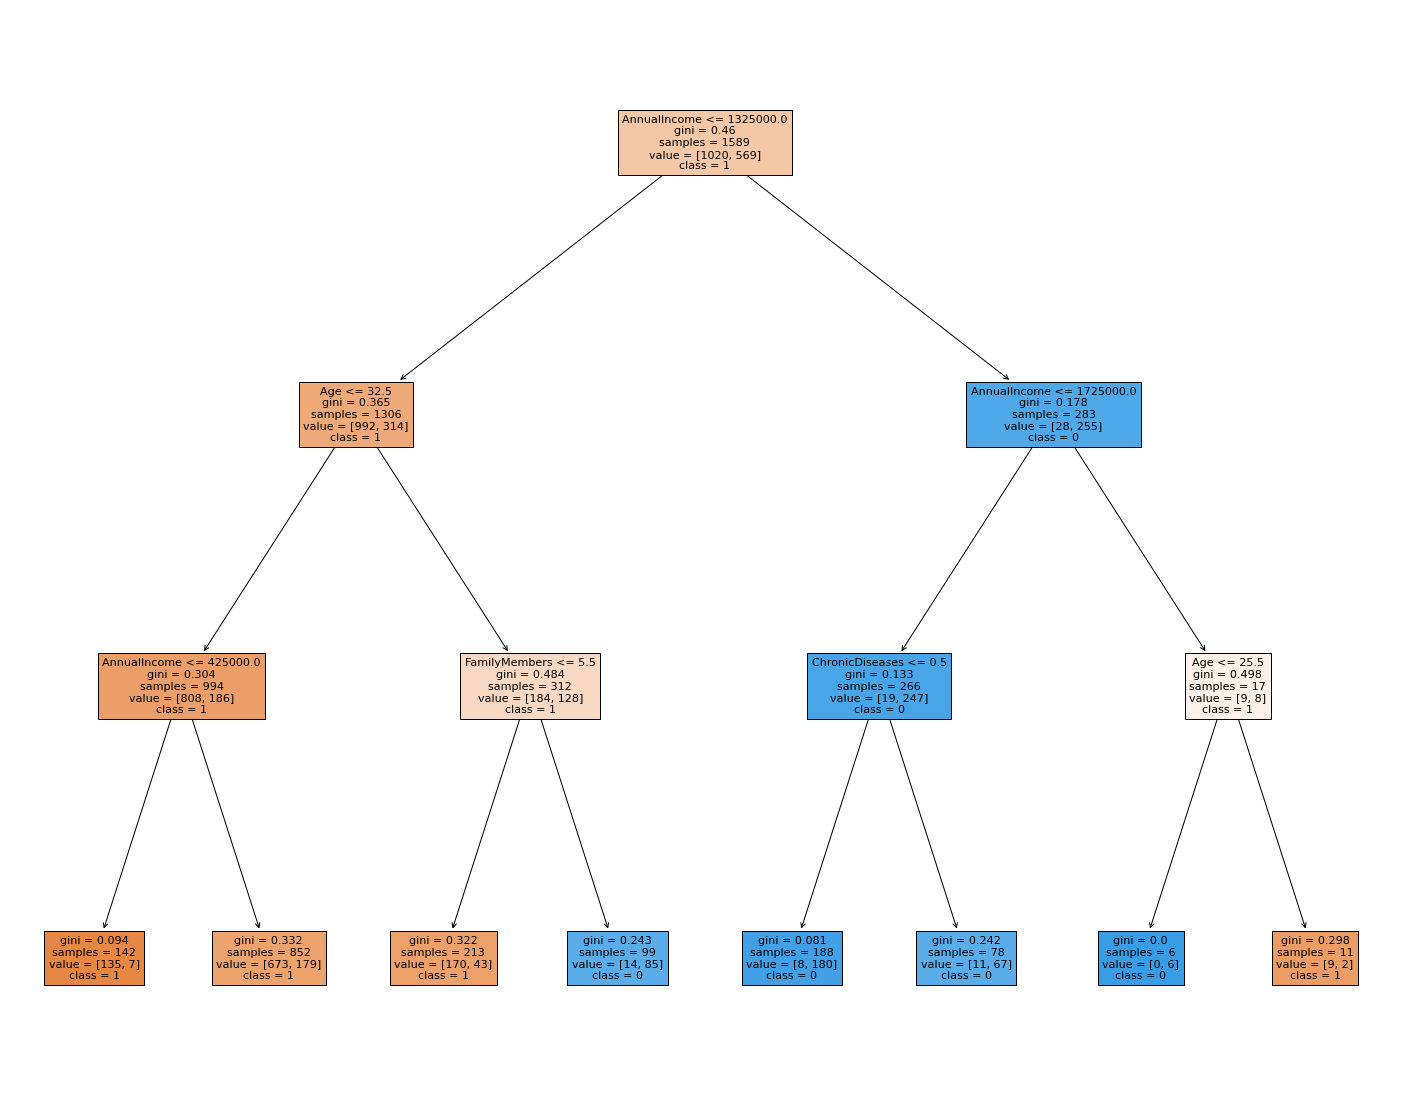

In [48]:
# Implementasi code di sini
from sklearn import datasets
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

data_features = list(data_train.columns)
data_labels = [str(label) for label in list(label_train['TravelInsurance'].unique())]

fig = plt.figure(figsize = (25, 20))
_ = plot_tree(decision_tree_depth_3, feature_names = data_features, class_names = data_labels, filled = True)

### SOAL 1c

[5]  Jika diberikan data X dengan fitur berikut:

* Age = 25
* EmployedbyGovernment = 1
* GraduateOrNot = 1
* AnnualIncome = 1800000
* FamilyMembers = 6
* ChronicDiseases = 1
* FrequentFlyer = 1
* EverTravelledAbroad = 0


Berdasarkan visualisasi yang dihasilkan pada Soal 1b, apa hasil prediksi `TravelInsurance` dari data X?    
**Catatan:** Tidak perlu dilakukan implementasi kode pada bagian ini


> Tidak membeli TravelInsurance. Karena berdasarkan node yang berada pada level 3 posisi kedua dari kanan. Dapat terlihat bahwa terdapat 6 samples dengan seluruh sample diprediksi tidak membeli TravelInsurance. Hal ini dapat dilihat dari value = [0, 6]. Selain itu, kesimpulan akhir terdapat pada variable class = 0. Itu artinya dengan spesifikasi diatas, mesin memprediksi bahwa data X tersebut tidak membeli TravelInsurance.

## SOAL 2

Implementasikan sebuah model Decision Tree untuk melakukan suatu task klasifikasi yang memprediksi `TravelInsurance` dari customer. Implementasi pada soal ini akan menggunakan nilai *hyperparameter* `max_depth = 3` dan min_samples_split = 50.

### SOAL 2a
[5]  Bangun model decision tree sesuai ketentuan.

In [60]:
# Implementasi code di sini
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

decision_tree_depth_3_min_sample_50 = DecisionTreeClassifier(max_depth = 3, min_samples_split = 50)
decision_tree_depth_3_min_sample_50.fit(data_train, label_train)

# predicted_data_depth_3_min_sample_50 = decision_tree_depth_3_min_sample_50.predict(data_test)

# print("Accuracy:", accuracy_score(label_test, predicted_data_depth_3_min_sample_50))
# print("Precision:", precision_score(label_test, predicted_data_depth_3_min_sample_50))
# print("Recall:", recall_score(label_test, predicted_data_depth_3_min_sample_50))
# print("F1-Score:", f1_score(label_test, predicted_data_depth_3_min_sample_50))

DecisionTreeClassifier(max_depth=3, min_samples_split=50)

### SOAL 2b
[5]  Visualisasikan model decision tree yang didapat pada soal 2a!

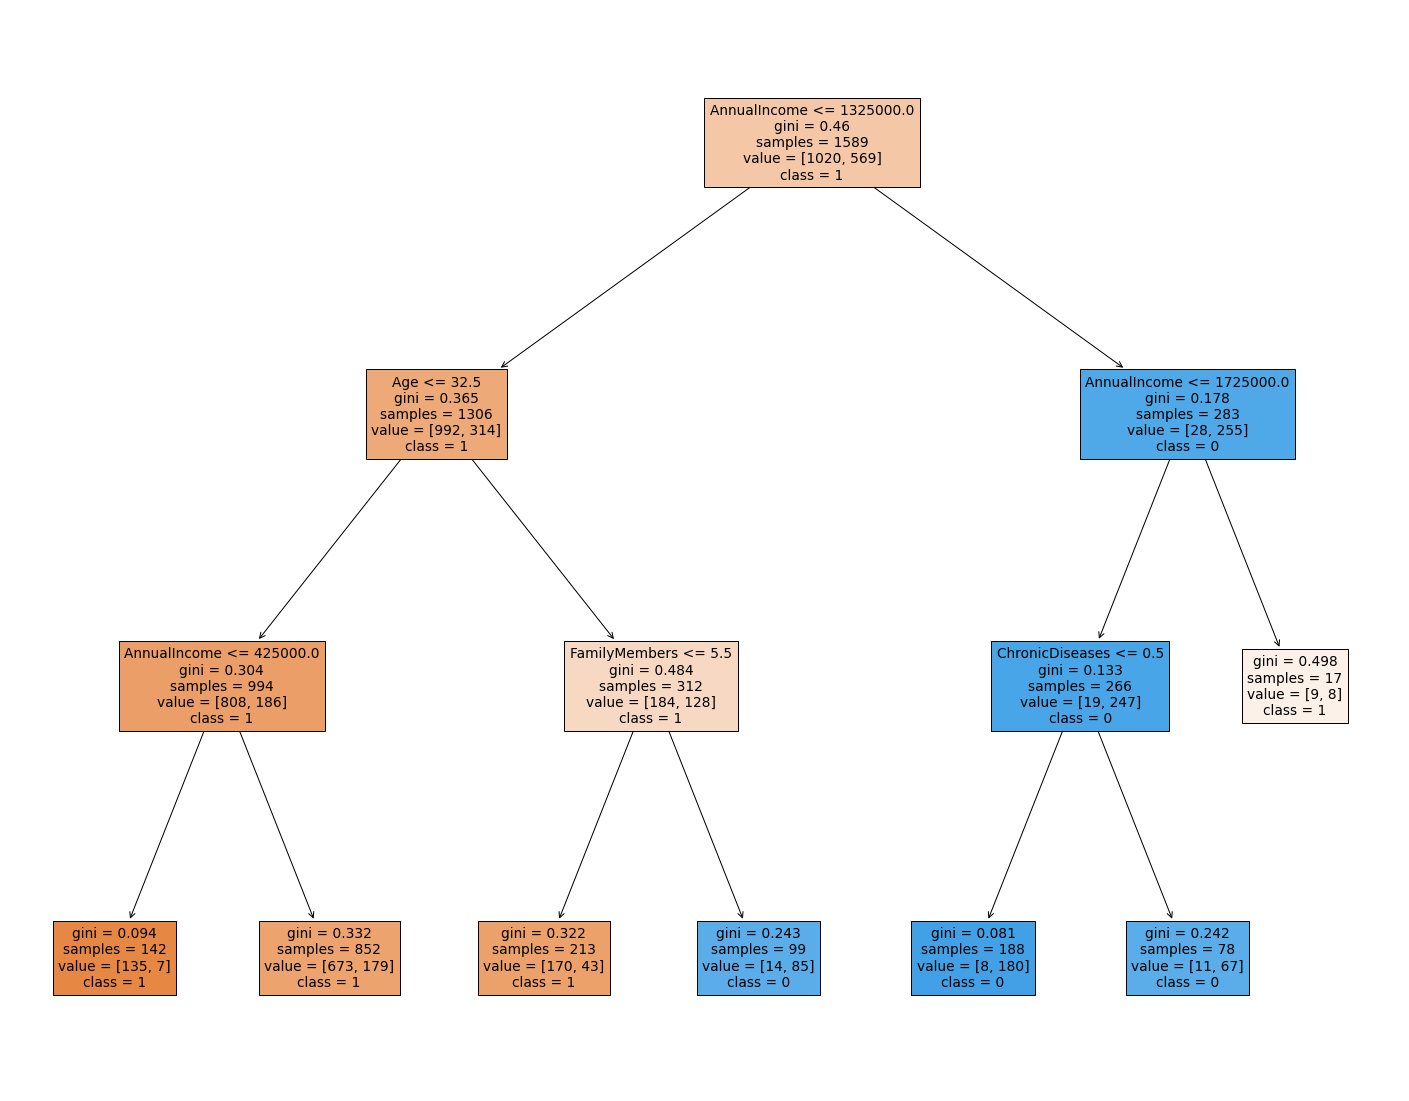

In [49]:
# Implementasi code di sini
from sklearn import datasets
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

depth_3_min_sample_50_data_features = list(data_train.columns)
depth_3_min_sample_50_data_labels = [str(label) for label in list(label_train['TravelInsurance'].unique())]

fig = plt.figure(figsize = (25, 20))
_ = plot_tree(decision_tree_depth_3_min_sample_50, 
              feature_names = depth_3_min_sample_50_data_features,
              class_names = depth_3_min_sample_50_data_labels, filled = True)

### SOAL 2c

[5]  Jika diberikan data X dengan fitur berikut:

* Age = 25
* EmployedbyGovernment = 1
* GraduateOrNot = 1
* AnnualIncome = 1800000
* FamilyMembers = 6
* ChronicDiseases = 1
* FrequentFlyer = 1
* EverTravelledAbroad = 0


Berdasarkan visualisasi yang dihasilkan pada Soal 1b, apa hasil prediksi `TravelInsurance` dari data X?    
**Catatan:** Tidak perlu dilakukan implementasi kode pada bagian ini

> Membeli TravelInsurance. Hal ini dapat dilihat pada decision tree level 2 dengan node posisi pertama dari kanan. Disitu tertulis bahwa terdapat 17 samples dengan 9 diantaranya diprediksi membeli TravelInsurance dan 8 diantranya tidak membeli. Juga kesimpulan prediksi mesin dapat dilihat pada variable class yang menyatakan nomor 1. Itu artinya mesin memprediksi dengan spesifikasi seperti data X diatas, membeli TravelInsurance.


## SOAL 3
[10]
* Lakukan prediksi terhadap data *testing* (`data_test`) menggunakan model yang sudah dibangun pada soal 1 dan 2.
* Lakukan evaluasi pada hasil prediksi yang didapat terhadap label aktual (`label_test`). Metrik evaluasi yang ditampilkan adalah nilai akurasi, presisi, recall, dan F1-Score dari hasil prediksi yang didapat.  
* Bandingkanlah hasil evaluasi yang didapat dan tuliskan analisis singkat terkait dengan perbandingan tersebut (minimal 3 poin).

**Number 1**

In [52]:
# Implementasi code di sini
predicted_data_depth_3 = decision_tree_depth_3.predict(data_test)

print("Accuracy:", accuracy_score(label_test, predicted_data_depth_3))
print("Precision:", precision_score(label_test, predicted_data_depth_3))
print("Recall:", recall_score(label_test, predicted_data_depth_3))
print("F1-Score:", f1_score(label_test, predicted_data_depth_3))

Accuracy: 0.8442211055276382
Precision: 0.9876543209876543
Recall: 0.5673758865248227
F1-Score: 0.7207207207207208


**Number 2**

In [61]:
# Implementasi code di sini
predicted_data_depth_3_min_sample_50 = decision_tree_depth_3_min_sample_50.predict(data_test)

print("Accuracy:", accuracy_score(label_test, predicted_data_depth_3_min_sample_50))
print("Precision:", precision_score(label_test, predicted_data_depth_3_min_sample_50))
print("Recall:", recall_score(label_test, predicted_data_depth_3_min_sample_50))
print("F1-Score:", f1_score(label_test, predicted_data_depth_3_min_sample_50))

Accuracy: 0.8442211055276382
Precision: 0.9876543209876543
Recall: 0.5673758865248227
F1-Score: 0.7207207207207208


> Berdasarkan hasil komputasi yang saya lakukan pada nomor 3 ini, kesimpulan yang dapat saya tarik adalah meskipun parameter pada kedua model berbeda namun dapat mengembalikan hasil akhir yang sama. \

> Pada model nomor 1, parameter yang digunakan adalah max_depth = 3 dan min_samples_split = 2 (karena menggunakan default). Sedangkan pada model nomor 2, parameter max_depth sama-sama 3 namun min_samples_splitnya bernilai 50. Secara accuracy dan precision sama-sama 84% dan 98%. \

> Yang menarik adalah cukup rendahnya nilai recall pada keduanya, yakni hanya 56%. Hal ini mengartikan bahwa cukup tingginya level False Negative yang dihasilkan oleh kedua mesin. Mungkin mesin perlu penyesuaian lebih lanjut dalam parameternya.


## SOAL 4

[20]  Implementasikan sebuah model Random Forest dengan *hyperparameter* `max_depth = 7` dan `n_estimators = 100` untuk *task* klasifikasi `TravelInsurance` dari customer.  

In [75]:
# Implementasi code di sini
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

random_forest_max_depth_7_n_100 = RandomForestClassifier(max_depth = 7, n_estimators = 100)
random_forest_max_depth_7_n_100.fit(data_train, label_train.values.ravel())

# random_forest_data_predicted = random_forest_max_depth_7_n_100.predict(data_test)

# print("Accuracy:", accuracy_score(label_test, random_forest_data_predicted))
# print("Precision:", precision_score(label_test, random_forest_data_predicted))
# print("Recall:", recall_score(label_test, random_forest_data_predicted))
# print("F1-Score:", f1_score(label_test, random_forest_data_predicted))

RandomForestClassifier(max_depth=7)

## SOAL 5

[25]  Gunakan GridSearchCV untuk mencari hyperparameter yang baik untuk model RandomForest. Kalian diwajibkan melakukan tuning pada hyperparameter berikut: **n_estimators, criterion, max_depth, min_samples_split**

In [68]:
# Implementasi code di sini
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [25, 50, 75, 100],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 3, 5, 7, 11, 13, 23],
    'min_samples_split': [2, 20, 40, 80, 100, 150]
}

rf = RandomForestClassifier()
clf = GridSearchCV(estimator = rf, param_grid = param_grid)
clf.fit(data_train, label_train.values.ravel())

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 2, 3, 5, 7, 11, 13, 23],
                         'min_samples_split': [2, 20, 40, 80, 100, 150],
                         'n_estimators': [25, 50, 75, 100]})

In [77]:
clf.best_params_

{'criterion': 'entropy',
 'max_depth': 7,
 'min_samples_split': 2,
 'n_estimators': 50}

## SOAL 6
[15]

* Lakukan prediksi terhadap data *testing* (`data_test`) menggunakan model yang sudah dibangun pada soal 4 dan 5.
* Lakukan evaluasi pada hasil prediksi yang didapat terhadap label aktual (`label_test`). Metrik evaluasi yang ditampilkan adalah nilai akurasi, presisi, recall, dan F1-Score dari hasil prediksi yang didapat.  
* Bandingkanlah hasil evaluasi yang didapat dan tuliskan analisis singkat terkait dengan perbandingan tersebut (Model mana yang lebih baik? Mengapa model tersebut lebih baik?).

**Number 4**

In [99]:
# Implementasi code di sini
random_forest_data_predicted = random_forest_max_depth_7_n_100.predict(data_test)

print("Accuracy:", accuracy_score(label_test, random_forest_data_predicted))
print("Precision:", precision_score(label_test, random_forest_data_predicted))
print("Recall:", recall_score(label_test, random_forest_data_predicted))
print("F1-Score:", f1_score(label_test, random_forest_data_predicted))

Accuracy: 0.8442211055276382
Precision: 0.9876543209876543
Recall: 0.5673758865248227
F1-Score: 0.7207207207207208


**Number 5**

In [100]:
# Implementasi code di sini
random_forest_best_combination = RandomForestClassifier(**clf.best_params_)
random_forest_best_combination.fit(data_train, label_train.values.ravel())

random_forest_data_best_combination = random_forest_best_combination.predict(data_test)

print("Accuracy:", accuracy_score(label_test, random_forest_data_best_combination))
print("Precision:", precision_score(label_test, random_forest_data_best_combination))
print("Recall:", recall_score(label_test, random_forest_data_best_combination))
print("F1-Score:", f1_score(label_test, random_forest_data_best_combination))

Accuracy: 0.8417085427135679
Precision: 0.975609756097561
Recall: 0.5673758865248227
F1-Score: 0.7174887892376682


> Pada perbandingan testing yang sudah saya berikan, dapat dilihat bahwa keduanya memberikan perbedaan yang cukup beragam, baik pada sisi akurasi, presisi dan f1-score. Namun uniknya recall keduanya sama-sama 56%. \\

> Pada hasil nomor 4, terlihat bahwa akurasi, presisi dan f1-score yang dihasilkan masing-masing adalah 84.4%, 98% dan 72%. \\

> Sedangkan pada nomor 5, hasil akurasi, presisi dan f1-score yang dihasilkan masing-masing adalah 84.1%, 97% dan 71%. \\

> Namun saya lebih tertarik pada hasil recall keduanya yang sama, ini membuktikan bahwa mesin sama-sama salah menginterpretasikan hal yang seharusnya benar malah dianggap salah. Hal ini sepertinya ditandai dengan tingginya nilai FN pada kedua mesin.

> Sedangkan apabila kita ambil secara overall, maka model nomor 4 lebih baik ketimbang model nomor 5. Karena akurasi yang dihasilkan oleh model nomor 4 lebih tinggi ketimbang nomor 5. Juga dari sisi presisinya. Sedangkan F1-score dipengaruhi oleh hasil presisi dan recallnya, saya anggap f1-score pada model 4 lebih tinggi karena dipengaruhi oleh hasil presisi yang lebih tinggi. \\